In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [9]:
# Import the ground truth data
Ground_Truth = pd.read_csv('/Users/raymondblahajr/Desktop/PDS/Machine_Learning_Stuff/test_data.csv', index_col=0)

# Import the test data
Test_Data = pd.read_csv('/Users/raymondblahajr/Desktop/PDS2.0/Classifications.csv', index_col=0)

Ground_Truth.reset_index(inplace=True)
Test_Data.reset_index(inplace=True)


In [10]:
print(Ground_Truth.head())
print(Test_Data.head())



# Ensure that the date columns are in datetime format for both dataframes
Ground_Truth['time'] = pd.to_datetime(Ground_Truth['time'])
Test_Data['DateTime'] = pd.to_datetime(Test_Data['DateTime'])


                  time  xrsa_flux  xrsb_flux  status flare_class  Sat  \
0  2022-06-10 09:33:00   0.000016   0.000354       0         NaN   16   
1  2022-06-10 09:34:00   0.000016   0.000351       0         NaN   16   
2  2022-06-10 09:35:00   0.000018   0.000349       0         NaN   16   
3  2022-06-10 09:36:00   0.000015   0.000348       0         NaN   16   
4  2022-06-10 09:37:00   0.000017   0.000349       0         NaN   16   

         date  xrsa_cumsum  xrsb_cumsum  
0  2022-06-10     1.000000     1.000001  
1  2022-06-10     1.000000     1.000002  
2  2022-06-10     1.000000     1.000002  
3  2022-06-10     1.000001     1.000003  
4  2022-06-10     1.000001     1.000004  
              DateTime  xrsa_flux  xrsb_flux     Error  Is_Peak
0  2022-06-10 09:33:00   0.000016   0.000354  0.000008    False
1  2022-06-10 09:34:00   0.000016   0.000351  0.000010    False
2  2022-06-10 09:35:00   0.000018   0.000349  0.000014    False
3  2022-06-10 09:36:00   0.000015   0.000348  0.00002

In [11]:
# print all the instances of 1 in status column of Ground_Truth
print(Ground_Truth[Ground_Truth['status'] == 1].count())

# Filter anomalies detected by the model and the test data
anomalies_pred = Test_Data[Test_Data['Is_Peak']]
anomalies_test = Ground_Truth[Ground_Truth['status'] == 1]

time           3747
xrsa_flux      3747
xrsb_flux      3747
status         3747
flare_class    3747
Sat            3747
date           3747
xrsa_cumsum    3747
xrsb_cumsum    3747
dtype: int64


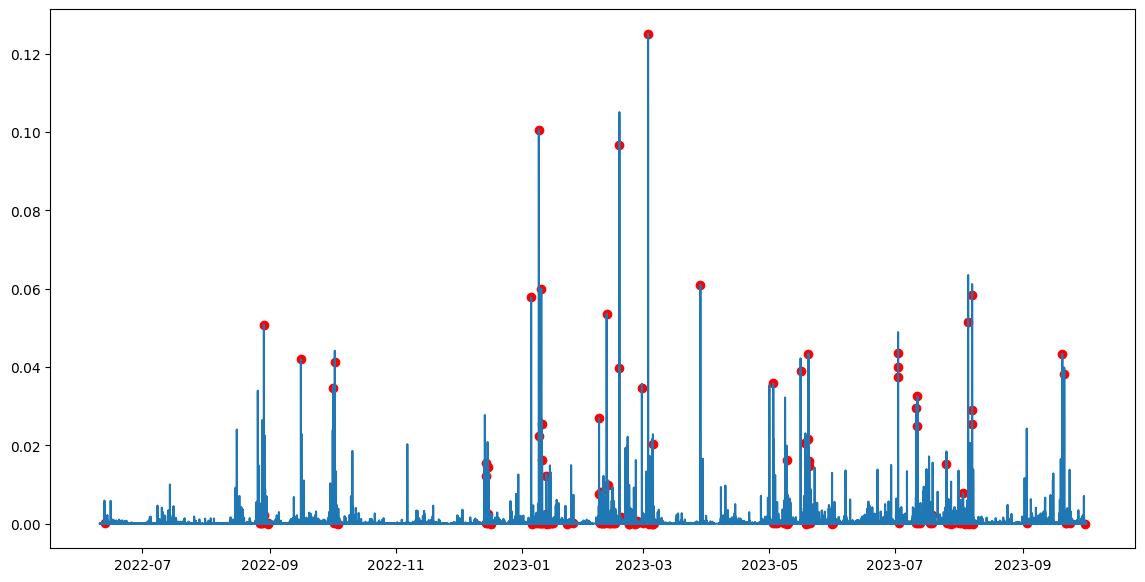

In [12]:
# Plot xrsa_flux from predictions where Is_Anomaly is True
plt.figure(figsize=(14, 7))
plt.plot(Test_Data['DateTime'], Test_Data['xrsa_flux'], label='Predicted xrsa_flux')
plt.scatter(anomalies_pred['DateTime'], anomalies_pred['xrsa_flux'], color='red', label='Predicted Anomalies')



              precision    recall  f1-score   support

           0       0.99      1.00      1.00    668742
           1       0.19      0.01      0.02      3738

    accuracy                           0.99    672480
   macro avg       0.59      0.50      0.51    672480
weighted avg       0.99      0.99      0.99    672480

[[668615    127]
 [  3708     30]]


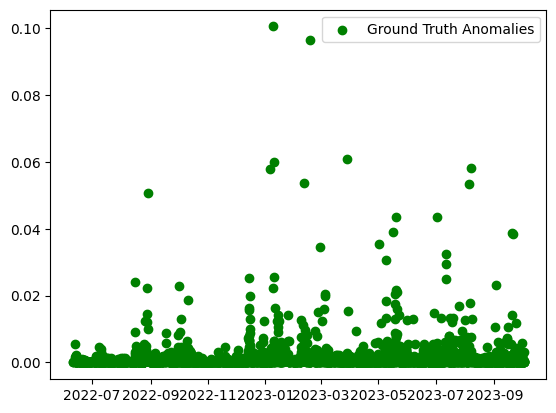

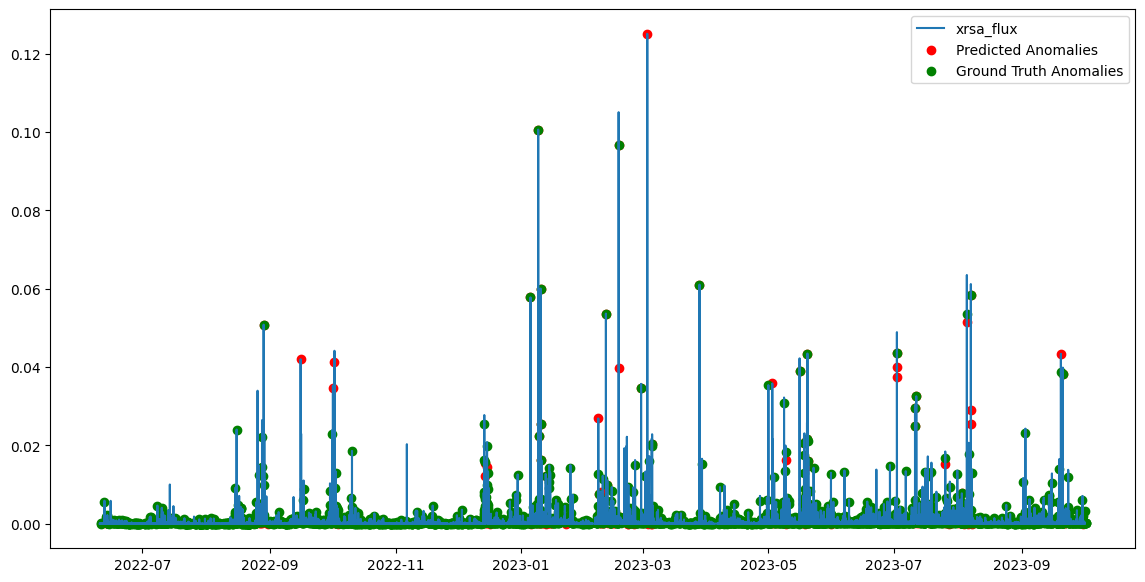

In [13]:
# Trim the longer dataset to match the shorter one
if len(Ground_Truth) > len(Test_Data):
    Ground_Truth = Ground_Truth.iloc[:len(Test_Data)]
elif len(Test_Data) > len(Ground_Truth):
    Test_Data = Test_Data.iloc[:len(Ground_Truth)]

# Now that the lengths match, you can proceed to create the binary arrays again and compute the confusion matrix
ground_truth_labels = Ground_Truth['status'].values
predicted_labels = Test_Data['Is_Peak'].astype(int).values


# Compare accuracy of the model to the ground truth
print(classification_report(Ground_Truth['status'], Test_Data['Is_Peak']))
print(confusion_matrix(Ground_Truth['status'], Test_Data['Is_Peak']))

# Plot the ground truth anomalies
plt.scatter(anomalies_test['time'], anomalies_test['xrsa_flux'], color='green', label='Ground Truth Anomalies')
plt.legend()
plt.show()

# Plot xrsa_flux from predictions where Is_Anomaly is True
plt.figure(figsize=(14, 7))
plt.plot(Test_Data['DateTime'], Test_Data['xrsa_flux'], label='xrsa_flux')
plt.scatter(anomalies_pred['DateTime'], anomalies_pred['xrsa_flux'], color='red', label='Predicted Anomalies')
plt.scatter(anomalies_test['time'], anomalies_test['xrsa_flux'], color='green', label='Ground Truth Anomalies')
plt.legend()
plt.show()
